<a href="https://colab.research.google.com/github/bhuvanabasapur/CMPE-258/blob/Assignment3/Assignments/Assignment%203/b3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Using pytorch with High level parameters to build neural network**

In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import TSNE
from sklearn.metrics import mean_squared_error
from typing import Callable
import numpy as np


Model

In [ ]:
class Model(nn.Module):
  def __init__(self, input_dim, num_hidden):
    super().__init__()
    self.linear1 = nn.Linear(input_dim, num_hidden)
    self.relu = nn.ReLU()
    self.linear2 = nn.Linear(num_hidden,2)

  def forward(self, X):
    l1 = self.linear1(X)
    r = self.relu(l1)
    l2 = self.linear2(r)
    return l2

Fit the model

In [ ]:
def fit(X:np.ndarray, y:np.ndarray, model:Callable, loss:Callable, learning_rate, num_epochs):
  optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
  for epoch in range(num_epochs):
    optimizer.zero_grad()
    pred_y = model(X)
    loss_value = loss(pred_y, y)
    if epoch % 5 == 0:
      print(f'Epoch: {epoch}, Loss: {loss_value}')
    loss_value.backward()
    optimizer.step()


Generate  data

In [ ]:
# no_samples, input_dim, output_dim, learning_rate = 500, 3, 2, 0.01 
# X = torch.FloatTensor(no_samples, input_dim).uniform_(-1, 1)
no_samples, input_dim = 200, 3 # 200 samples, input dimension = 3
X = np.random.uniform(-1, 1, (no_samples, input_dim))
#Initialise weights 
true_weights = np.array([[6, 1, 8], [-3, 1, 3]]).T
true_bias = np.array([[1],[1]]).T

true_y = (X**2) @ true_weights + X @ true_weights + true_bias
print(f'X: {X.shape}, weights: {true_weights.shape}, bias: {true_bias.shape}, y: {true_y.shape}')

X: (200, 3), weights: (3, 2), bias: (1, 2), y: (200, 2)


Plotting the data

In [ ]:
def plot_3d(title, X, y, y_pred=None):
  X_tnse = TSNE(n_components=2, random_state=123).fit_transform(X)
  print(y.shape)
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  ax.scatter(X_tnse[:,0], X_tnse[:,1], y, label='y_true')
  ax.set_title(title)

  if y_pred is not None:
    ax.scatter(X_tnse[:,0], X_tnse[:,1], y_pred, label='y_pred', marker='v')
  plt.legend()
  plt.show()

(200,)


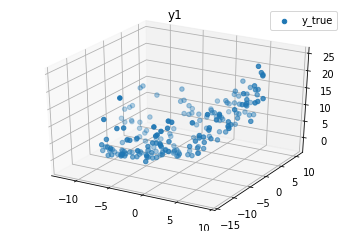

(200,)


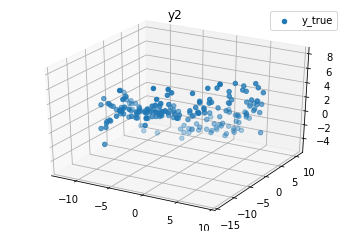

In [ ]:
plot_3d('y1', X, true_y[:,0])
plot_3d('y2', X, true_y[:,1])

Running the model

Loss value: 37.800254821777344


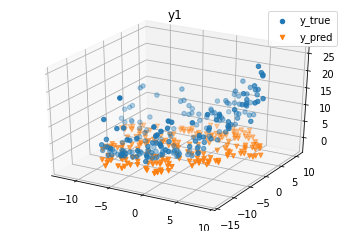

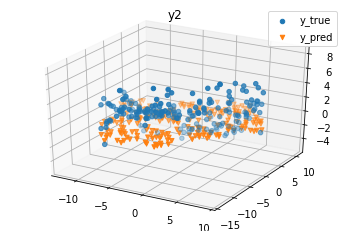

In [ ]:
#running the model for 1 cycle

loss = nn.MSELoss()
model = Model(input_dim, 10)
X_tensor = torch.tensor(X).float()
true_y_tensor = torch.tensor(true_y).float()
pred_y_tensor = model(X_tensor).detach()
loss_value = loss(pred_y_tensor, true_y_tensor)
print(f'Loss value: {loss_value}')
plot_3d('y1', X, true_y[:, 0], pred_y_tensor[:, 0])
plot_3d('y2', X, true_y[:, 1], pred_y_tensor[:, 1])

Epoch: 0, Loss: 37.800254821777344
Epoch: 5, Loss: 34.430946350097656
Epoch: 10, Loss: 31.011690139770508
Epoch: 15, Loss: 27.37015151977539
Epoch: 20, Loss: 23.62994956970215
Epoch: 25, Loss: 20.166223526000977
Epoch: 30, Loss: 17.296030044555664
Epoch: 35, Loss: 15.092885971069336
Epoch: 40, Loss: 13.428069114685059
Epoch: 45, Loss: 12.13572883605957
Epoch: 50, Loss: 11.103111267089844
Epoch: 55, Loss: 10.265071868896484
Epoch: 60, Loss: 9.547656059265137
Epoch: 65, Loss: 8.942403793334961
Epoch: 70, Loss: 8.414947509765625
Epoch: 75, Loss: 7.95758056640625
Epoch: 80, Loss: 7.550464630126953
Epoch: 85, Loss: 7.173486709594727
Epoch: 90, Loss: 6.825632095336914
Epoch: 95, Loss: 6.5013427734375


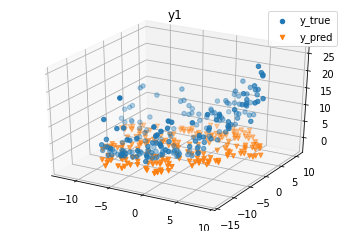

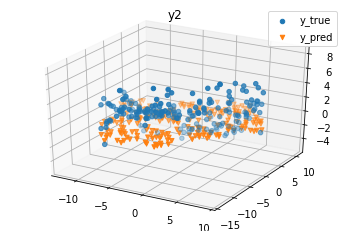

In [ ]:
#running for 100 epochs
fit(X_tensor, true_y_tensor, model=model, loss=loss, learning_rate=0.01, num_epochs=100)
pred_y = model(X_tensor)
pred_y = pred_y.detach().numpy()
plot_3d('y1', X, true_y[:, 0], pred_y_tensor[:, 0])
plot_3d('y2', X, true_y[:, 1], pred_y_tensor[:, 1])